In [1]:
from OptimizedGeneticAlgorithm import GeneticAlgorithm
from OptimizedGeneticAlgorithmReal import RealGeneticAlgorithm
import numpy as np
import matplotlib.pyplot as plt
import random

%matplotlib inline

In [2]:
num_parents = 40

## Selection Methods

In [3]:
def roulette_wheel(pop, num_parents):
    selected_parents = []
    total_fitness = sum([ind.fitness for ind in pop])
    for i in range(num_parents):
        r = np.random.uniform()
        p_acum = 0
        for ind in pop:
            p_ind = ind.fitness / total_fitness
            p_acum += p_ind
            if r <= p_acum:
                selected_parents.append(ind)
                break
    return selected_parents

In [4]:
def rank( population, parentsLength ):
    parents = []
    populationLength = len( population )
    ranked_pop = sorted(population, key=lambda individual: individual.fitness, reverse=True )
    for i in range( parentsLength ):
        randomNumber = random.random()
        for j in range( populationLength ):
            individual = ranked_pop[j]
            probability = ( j + 1 ) / populationLength

            if randomNumber <= probability:
                parents.append( individual )
                break
    return parents

In [5]:
def tournament(pop, num_parents, k=20):
    n = len(pop)
    selected_parents = []
    for i in range(num_parents):
        k_pop = np.random.choice(pop, size=k)
        best = max(k_pop, key=lambda x: x.fitness)
        selected_parents.append(best)
    return selected_parents

In [6]:
def elitist(pop, num_parents):
    n = len(pop)
    ranked_pop = sorted(pop, key=lambda x: x.fitness, reverse=True)
    selected_parents = ranked_pop[:int(len(pop)*0.1)]
    if len(selected_parents) >= num_parents:
        return selected_parents[:num_parents]
    rest_amount = num_parents - len(selected_parents)
    no_elit = list(np.random.choice(pop[int(len(pop)*0.1):int(len(pop)*0.9)], size=rest_amount))
    return selected_parents + no_elit 

## Replacement Methods

In [13]:
def generational(parents, children):
    return children

In [14]:
def stable_state(parents, children):
    return sorted(parents + children, key=lambda x: x.fitness, reverse=True)[:len(parents)]

## Classic Genetic Algorithm

In [15]:
def GeneticAlgorithmIteration(fitness, T, chrom_size, P, selection, replacement):
    GA = GeneticAlgorithm(chrom_size)
    pop = [GA.create_individual() for i in range(P)]
    fitness_iter = []
    for individual in pop:
        individual.calculate_fitness(fitness)
    for t in range(T):
        selection_method = eval(selection)
        parents = selection_method(pop, num_parents)
        new_pop = []
        for i in range(int(P/2)):
            parent1 = parents[np.random.randint(0, len(parents))]
            parent2 = parents[np.random.randint(0, len(parents))]
            cross_point = np.random.randint(1,chrom_size-1)
            child1, child2 = GA.crossover(parent1.chromosome, parent2.chromosome, cross_point)
            child1 = GA.mutation(child1.chromosome)
            child2 = GA.mutation(child2.chromosome)
            child1.calculate_fitness(fitness)
            child2.calculate_fitness(fitness)
            replacement_method = eval(replacement)
            new_gen = replacement_method([parent1, parent2],[child1, child2])
            for ind in new_gen:
                new_pop.append(ind)
            #print(max(pop, key=lambda x: x.fitness).fitness)
        pop = new_pop
        fitness_iter.append(max(pop, key=lambda x: x.fitness).fitness)
    return max(pop, key=lambda x: x.fitness), fitness_iter

## Fitness Functions

In [16]:
def MaxOnes_fitness(chromosome):
    cnt = 0
    while(chromosome):
        cnt += chromosome & 1
        chromosome >>= 1
    return cnt

In [17]:
def deceptive4_fitness(chromosome):
    if chromosome == 0:
        return 41
    else:
        cnt = 0
        while(chromosome):
            cnt += chromosome & 1
            chromosome >>= 1
        return cnt 

## Experiments

In [18]:
def run_experiment(num_experiments, fitness, T, 
                   chrom_size, P, selection, replacement):
    history_fitness = []
    for i in range(num_experiments):
        best, fitness_iter = GeneticAlgorithmIteration(fitness, T, chrom_size, P,
                                selection, replacement)
        history_fitness.append(fitness_iter)
    return np.array(history_fitness)

In [19]:
def standarDeviation(x):
    return np.sqrt(np.sum((x-np.median(x))**2)/len(x))

In [20]:
def getErrorPlot(data, num_steps=100):
    x = list(range(0, data.shape[1], num_steps))
    y = np.empty(0)
    std = np.empty(0)
    for j in range(0, data.shape[1], num_steps):
        xj = data[:, j]
        y = np.append(y, np.median(xj))
        std = np.append(std, standarDeviation(xj))
    return x, y, std

In [21]:
def plotGraphs(graph):
    plt.plot(list(range(1,101)), np.average(graph, axis=0), label='Average')
    plt.plot(list(range(1,101)), np.median(graph, axis=0), label='Median')
    plt.plot(list(range(1,101)), np.min(graph, axis=0), label='Min')
    plt.plot(list(range(1,101)), np.max(graph, axis=0), label='Max')
    x, y, z = getErrorPlot(graph, 5)
    plt.errorbar(x, y, z, marker='^', ls='None')
    plt.legend(loc='upper right', shadow=True, fontsize = "xx-small")
    plt.xlabel('generation')
    plt.ylabel('fitness')

### Max-One

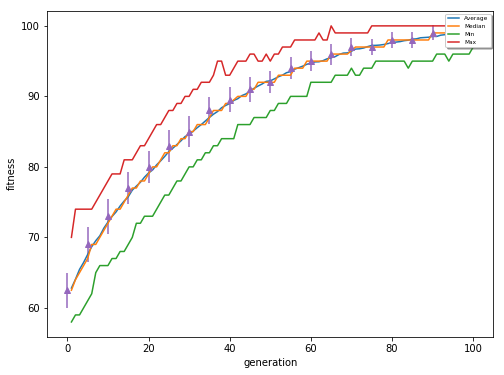

In [70]:
history_fitness = run_experiment(100, MaxOnes_fitness, 100, 100, 100,
                                "roulette_wheel", "stable_state")

plt.figure(figsize=(8,6))
plotGraphs(history_fitness)

In [71]:
results = history_fitness[:,99]
print("Mean: {}".format(np.median(results)))
print("Standard Deviation: {}".format(standarDeviation(results)))

Mean: 99.0
Standard Deviation: 0.7745966692414834


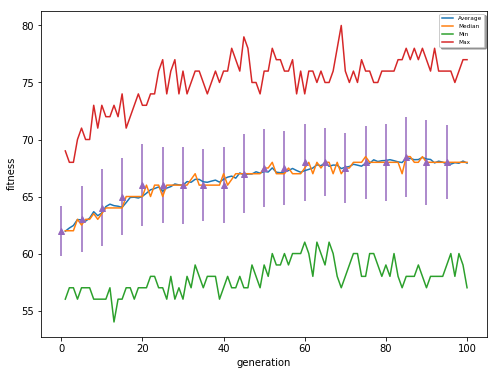

In [72]:
history_fitness = run_experiment(100, MaxOnes_fitness, 100, 100, 100,
                                "roulette_wheel", "generational")

plt.figure(figsize=(8,6))
plotGraphs(history_fitness)

In [73]:
results = history_fitness[:,99]
print("Mean: {}".format(np.median(results)))
print("Standard Deviation: {}".format(standarDeviation(results)))

Mean: 68.0
Standard Deviation: 3.7403208418530087


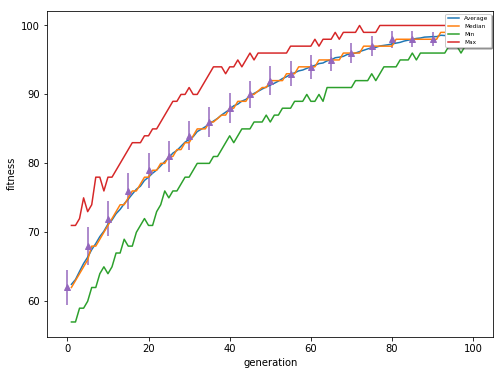

In [74]:
history_fitness = run_experiment(100, MaxOnes_fitness, 100, 100, 100,
                                "rank", "stable_state")

plt.figure(figsize=(8,6))
plotGraphs(history_fitness)

In [75]:
results = history_fitness[:,99]
print("Mean: {}".format(np.median(results)))
print("Standard Deviation: {}".format(standarDeviation(results)))

Mean: 99.0
Standard Deviation: 0.7810249675906654


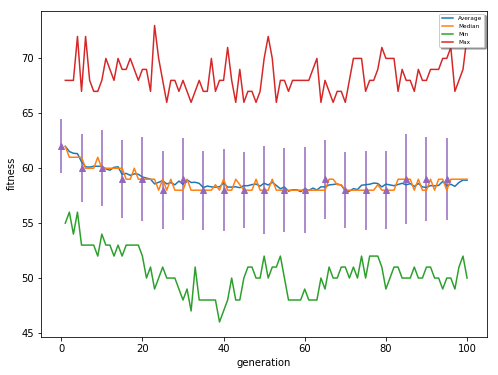

In [76]:
history_fitness = run_experiment(100, MaxOnes_fitness, 100, 100, 100,
                                "rank", "generational")

plt.figure(figsize=(8,6))
plotGraphs(history_fitness)

In [77]:
results = history_fitness[:,99]
print("Mean: {}".format(np.median(results)))
print("Standard Deviation: {}".format(standarDeviation(results)))

Mean: 59.0
Standard Deviation: 3.9025632602175713


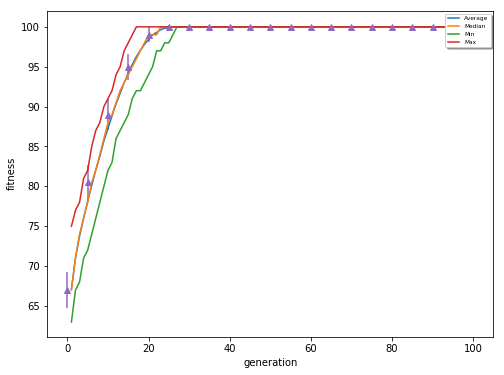

In [78]:
history_fitness = run_experiment(100, MaxOnes_fitness, 100, 100, 100,
                                "tournament", "stable_state")

plt.figure(figsize=(8,6))
plotGraphs(history_fitness)

In [79]:
results = history_fitness[:,99]
print("Mean: {}".format(np.median(results)))
print("Standard Deviation: {}".format(standarDeviation(results)))

Mean: 100.0
Standard Deviation: 0.0


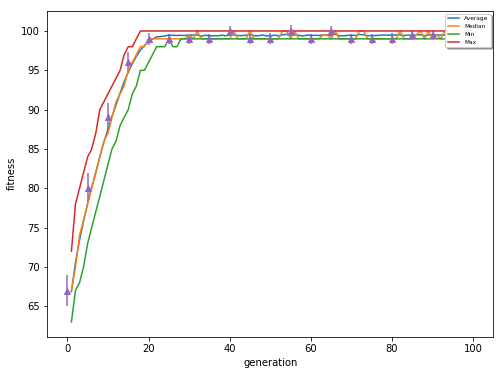

In [80]:
history_fitness = run_experiment(100, MaxOnes_fitness, 100, 100, 100,
                                "tournament", "generational")

plt.figure(figsize=(8,6))
plotGraphs(history_fitness)

In [81]:
results = history_fitness[:,99]
print("Mean: {}".format(np.median(results)))
print("Standard Deviation: {}".format(standarDeviation(results)))

Mean: 99.0
Standard Deviation: 0.6928203230275509


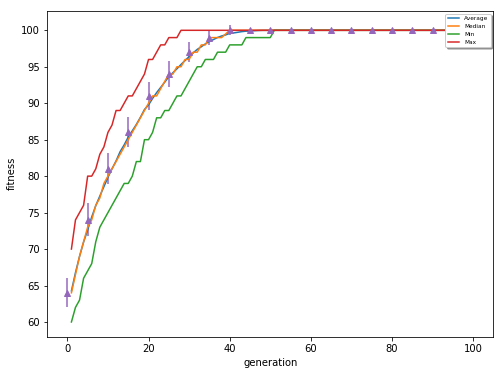

In [82]:
history_fitness = run_experiment(100, MaxOnes_fitness, 100, 100, 100,
                                "elitist", "stable_state")

plt.figure(figsize=(8,6))
plotGraphs(history_fitness)

In [83]:
results = history_fitness[:,99]
print("Mean: {}".format(np.median(results)))
print("Standard Deviation: {}".format(standarDeviation(results)))

Mean: 100.0
Standard Deviation: 0.0


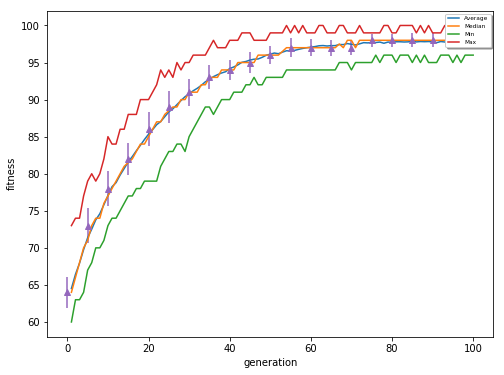

In [84]:
history_fitness = run_experiment(100, MaxOnes_fitness, 100, 100, 100,
                                "elitist", "generational")

plt.figure(figsize=(8,6))
plotGraphs(history_fitness)

In [85]:
results = history_fitness[:,99]
print("Mean: {}".format(np.median(results)))
print("Standard Deviation: {}".format(standarDeviation(results)))

Mean: 98.0
Standard Deviation: 0.8774964387392122


### Deceptive-4

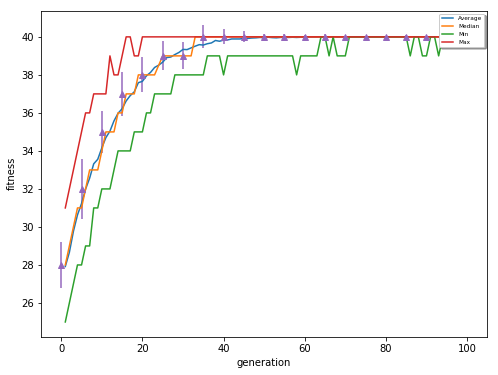

In [87]:
history_fitness = run_experiment(100, deceptive4_fitness, 100, 40, 100,
                                "roulette_wheel", "stable_state")

plt.figure(figsize=(8,6))
plotGraphs(history_fitness)

In [88]:
results = history_fitness[:,99]
print("Mean: {}".format(np.median(results)))
print("Standard Deviation: {}".format(standarDeviation(results)))

Mean: 40.0
Standard Deviation: 0.0


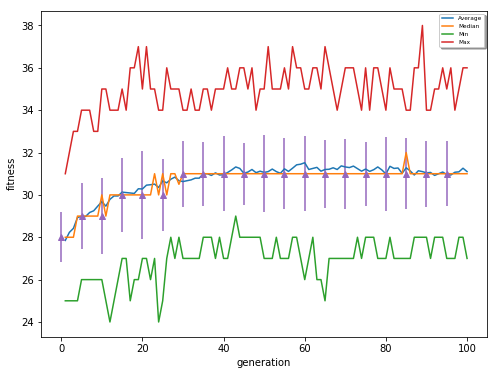

In [89]:
history_fitness = run_experiment(100, deceptive4_fitness, 100, 40, 100,
                                "roulette_wheel", "generational")

plt.figure(figsize=(8,6))
plotGraphs(history_fitness)

In [90]:
results = history_fitness[:,99]
print("Mean: {}".format(np.median(results)))
print("Standard Deviation: {}".format(standarDeviation(results)))

Mean: 31.0
Standard Deviation: 1.6852299546352716


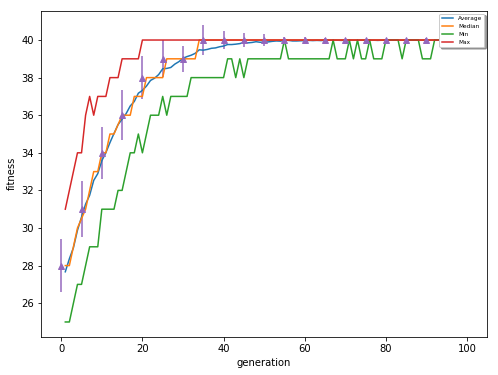

In [91]:
history_fitness = run_experiment(100, deceptive4_fitness, 100, 40, 100,
                                "rank", "stable_state")

plt.figure(figsize=(8,6))
plotGraphs(history_fitness)

In [92]:
results = history_fitness[:,99]
print("Mean: {}".format(np.median(results)))
print("Standard Deviation: {}".format(standarDeviation(results)))

Mean: 40.0
Standard Deviation: 0.0


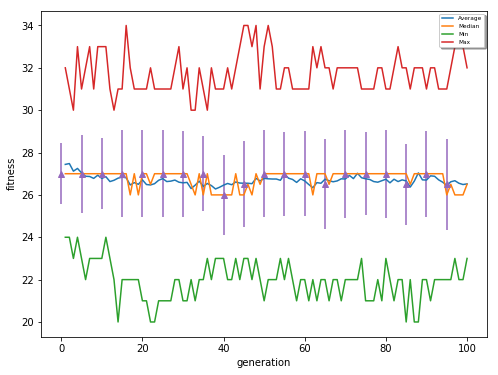

In [93]:
history_fitness = run_experiment(100, deceptive4_fitness, 100, 40, 100,
                                "rank", "generational")

plt.figure(figsize=(8,6))
plotGraphs(history_fitness)

In [94]:
results = history_fitness[:,99]
print("Mean: {}".format(np.median(results)))
print("Standard Deviation: {}".format(standarDeviation(results)))

Mean: 26.5
Standard Deviation: 1.9621416870348585


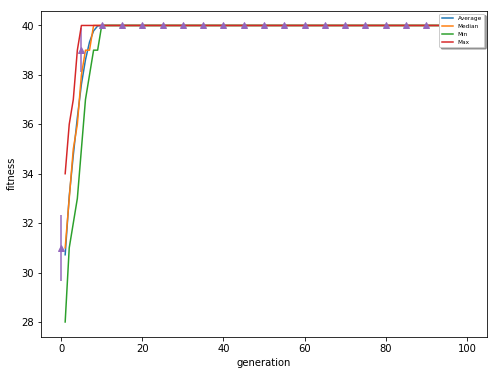

In [95]:
history_fitness = run_experiment(100, deceptive4_fitness, 100, 40, 100,
                                "tournament", "stable_state")

plt.figure(figsize=(8,6))
plotGraphs(history_fitness)

In [96]:
results = history_fitness[:,99]
print("Mean: {}".format(np.median(results)))
print("Standard Deviation: {}".format(standarDeviation(results)))

Mean: 40.0
Standard Deviation: 0.0


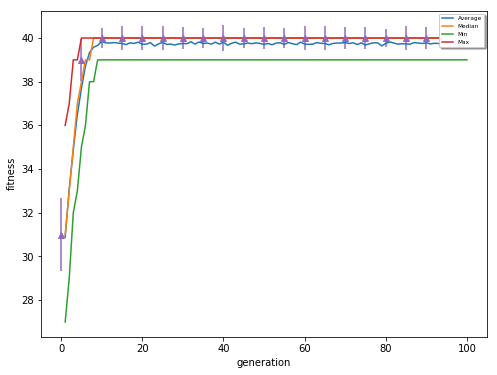

In [97]:
history_fitness = run_experiment(100, deceptive4_fitness, 100, 40, 100,
                                "tournament", "generational")

plt.figure(figsize=(8,6))
plotGraphs(history_fitness)

In [98]:
results = history_fitness[:,99]
print("Mean: {}".format(np.median(results)))
print("Standard Deviation: {}".format(standarDeviation(results)))

Mean: 40.0
Standard Deviation: 0.5477225575051661


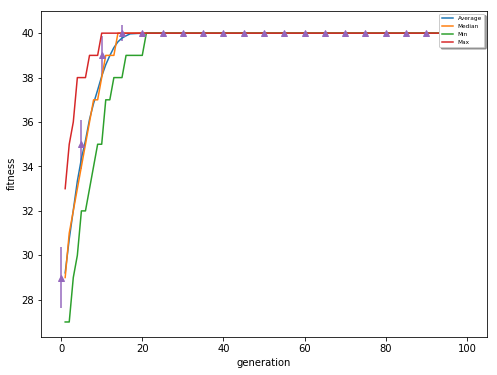

In [99]:
history_fitness = run_experiment(100, deceptive4_fitness, 100, 40, 100,
                                "elitist", "stable_state")

plt.figure(figsize=(8,6))
plotGraphs(history_fitness)

In [100]:
results = history_fitness[:,99]
print("Mean: {}".format(np.median(results)))
print("Standard Deviation: {}".format(standarDeviation(results)))

Mean: 40.0
Standard Deviation: 0.0


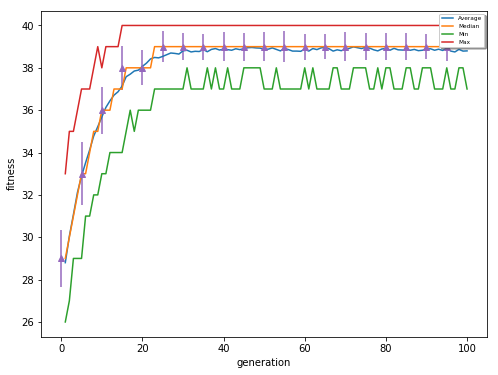

In [101]:
history_fitness = run_experiment(100, deceptive4_fitness, 100, 40, 100,
       history_fitness = run_experiment(100, deceptive4_fitness, 100, 40, 100,
                                "elitist", "generational")

plt.figure(figsize=(8,6))
plotGraphs(history_fitness)

In [102]:
results = history_fitness[:,99]
print("Mean: {}".format(np.median(results)))
print("Standard Deviation: {}".format(standarDeviation(results)))

Mean: 39.0
Standard Deviation: 0.6928203230275509


# Real Functions

## Selection Methods

In [16]:
def roulette_wheel(pop, num_parents):
    selected_parents = []
    total_fitness = sum([ind.fitness for ind in pop])
    for i in range(num_parents):
        r = np.random.uniform()
        q_acum = 0
        for ind in pop:
            p_ind = ind.fitness / total_fitness
            q_ind = (1 - p_ind)/(len(pop)-1)
            q_acum += q_ind
            if r <= q_acum:
                selected_parents.append(ind)
                break
    return selected_parents

In [17]:
def rank( population, parentsLength ):
    parents = []
    populationLength = len( population )
    ranked_pop = sorted(population, key=lambda individual: individual.fitness)
    for i in range( parentsLength ):
        randomNumber = random.random()
        for j in range( populationLength ):
            individual = ranked_pop[j]
            probability = ( j + 1 ) / populationLength

            if randomNumber <= probability:
                parents.append( individual )
                break
    return parents

In [18]:
def tournament(pop, num_parents, k=20):
    n = len(pop)
    selected_parents = []
    for i in range(num_parents):
        k_pop = np.random.choice(pop, size=k)
        best = min(k_pop, key=lambda x: x.fitness)
        selected_parents.append(best)
    return selected_parents

In [19]:
def elitist(pop, num_parents):
    n = len(pop)
    ranked_pop = sorted(pop, key=lambda x: x.fitness)
    selected_parents = ranked_pop[:int(len(pop)*0.1)]
    if len(selected_parents) >= num_parents:
        return selected_parents[:num_parents]
    rest_amount = num_parents - len(selected_parents)
    no_elit = list(np.random.choice(pop[int(len(pop)*0.1):int(len(pop)*0.9)], size=rest_amount))
    return selected_parents + no_elit 

## Replacement Methods

In [22]:
def stable_state(parents, children):
    return sorted(parents + children, key=lambda x: x.fitness)[:len(parents)]

## Genetic Algorithm for Reals

In [7]:
def RealGeneticAlgorithmIteration(fitness, T, chrom_size, num_dim,
                                  limits, num_decimals, P, dist):
    GA = RealGeneticAlgorithm(chrom_size, num_dim)
    pop = [GA.create_individual(limits, num_decimals) for i in range(P)]
    fitness_iter = []
    for individual in pop:
        individual.calculate_fitness(fitness, limits, num_decimals)
    for t in range(T):
        new_pop = []
        for i in range(int(P/2)):
            parent1 = pop[np.random.randint(0, len(pop))]
            parent2 = pop[np.random.randint(0, len(pop))]
            cross_point = np.random.randint(1, num_dim)
            child1, child2 = GA.crossover(parent1, parent2, cross_point)
            child1 = GA.mutation(child1.chromosome, limits, num_decimals)
            child2 = GA.mutation(child2.chromosome, limits, num_decimals)
            child1.calculate_fitness(fitness, limits, num_decimals)
            child2.calculate_fitness(fitness, limits, num_decimals)
            if dist(parent1, child1) + dist(parent2, child2) <= dist(parent1, child2) + dist(parent2, child1):
                if child1 >= parent1:
                    new_pop.append(child1)
                else:
                    new_pop.append(parent1)
                    
                if child2 >= parent2:
                    new_pop.append(child2)
                else:
                    new_pop.append(parent2)
            else:
                if child2 >= parent1:
                    new_pop.append(child2)
                else:
                    new_pop.append(parent1)
                    
                if child1 >= parent2:
                    new_pop.append(child1)
                else:
                    new_pop.append(parent2)

            #replacement_method = eval(replacement)
            #new_gen = replacement_method([parent1, parent2],[child1, child2])
            for ind in new_gen:
                new_pop.append(ind)
            #print(max(pop, key=lambda x: x.fitness).fitness)
        pop = new_pop
        #fitness_iter.append(max(pop, key=lambda x: x.fitness).fitness)
    return pop

## Real-Value Representation

In [30]:
def real2bin(x, limits, num_decimals):
    x_bin = []
    limit_bin = int(limits[1] * (10**num_decimals))
    num_bits = len(bin(limit_bin)) - 2
    for x_i in x:
        if x_i < 0:
            x_bin.append(round(x_i*(10**num_decimals) + 2**(num_bits+1)))
        else:
            x_bin.append(round(x_i*(10**num_decimals)))
    return x_bin

In [31]:
def bin2real(x, limits, num_decimals):
    x_real = []
    limit_bin = int(limits[1] * (10**num_decimals))
    num_bits = len(bin(limit_bin)) - 2
    for x_i in x:
        if x_i > limit_bin:
            x_real.append((x_i- 2**(num_bits+1))/(10**num_decimals))
        else:
            x_real.append(x_i/(10**num_decimals))
    return x_real

### Rastringin

In [32]:
def Rastrigin(x):
    A = 10
    d = len(x)
    return A * d + sum([x[i]**2 - A * np.cos(2*np.pi*x[i]) for i in range(d)])

limits = [-5.12, 5.12]
num_decimals = 2
chrom_size = len(bin(round(limits[1] * (10**2))))-1

## Experiments

In [33]:
def run_experiment_real(num_experiments, fitness, T, chrom_size,
                        num_dim, limits, num_decimals, 
                        P, selection, replacement):
    history_fitness = []
    for i in range(num_experiments):
        best, fitness_iter = RealGeneticAlgorithmIteration(fitness, T, chrom_size, 
                                num_dim, limits, num_decimals, P,
                                selection, replacement)
        history_fitness.append(fitness_iter)
    return np.array(history_fitness)

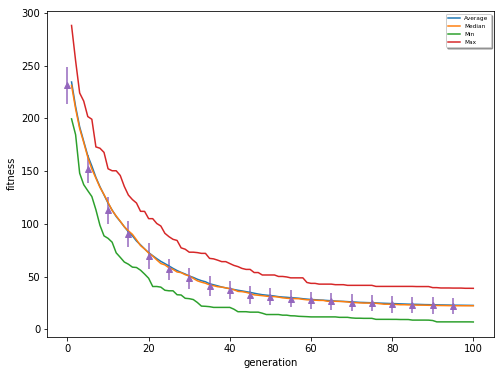

In [99]:
history_fitness = run_experiment_real(100, Rastrigin, 100, chrom_size,
                                 10, limits, num_decimals,
                                 100, "roulette_wheel", "stable_state")

plt.figure(figsize=(8,6))
plotGraphs(history_fitness)

In [100]:
results = history_fitness[:,99]
print("Mean: {}".format(np.median(results)))
print("Standard Deviation: {}".format(standarDeviation(results)))

Mean: 22.260107861508637
Standard Deviation: 7.805756444329897


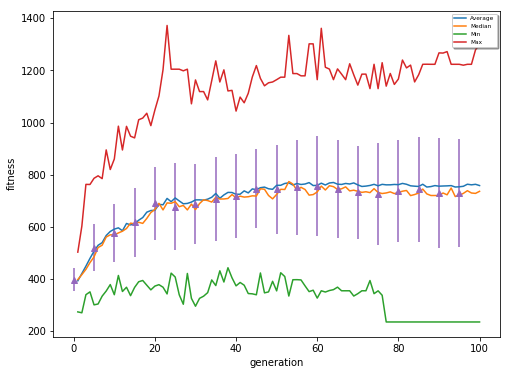

In [27]:
history_fitness = run_experiment_real(100, Rastrigin, 100, chrom_size,
                                 10, limits, num_decimals,
                                 100, "roulette_wheel", "generational")

plt.figure(figsize=(8,6))
plotGraphs(history_fitness)

In [28]:
results = history_fitness[:,99]
print("Mean: {}".format(np.median(results)))
print("Standard Deviation: {}".format(standarDeviation(results)))

Mean: 736.0705798569882
Standard Deviation: 213.79944516974334


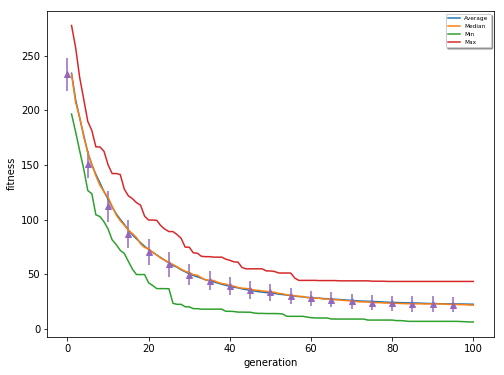

In [104]:
history_fitness = run_experiment_real(100, Rastrigin, 100, chrom_size,
                                 10, limits, num_decimals,
                                 100, "rank", "stable_state")

plt.figure(figsize=(8,6))
plotGraphs(history_fitness)

In [105]:
results = history_fitness[:,99]
print("Mean: {}".format(np.median(results)))
print("Standard Deviation: {}".format(standarDeviation(results)))

Mean: 21.79513104032143
Standard Deviation: 7.225468240901299


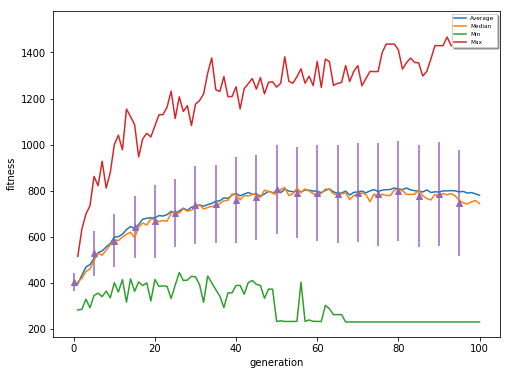

In [29]:
history_fitness = run_experiment_real(100, Rastrigin, 100, chrom_size,
                                 10, limits, num_decimals,
                                 100, "rank", "generational")

plt.figure(figsize=(8,6))
plotGraphs(history_fitness)

In [30]:
results = history_fitness[:,99]
print("Mean: {}".format(np.median(results)))
print("Standard Deviation: {}".format(standarDeviation(results)))

Mean: 744.0912059459401
Standard Deviation: 237.95922974391496


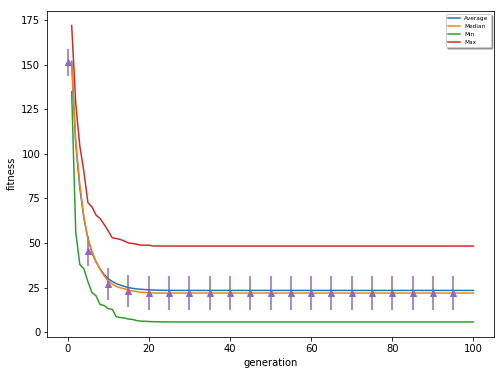

In [108]:
history_fitness = run_experiment_real(100, Rastrigin, 100, chrom_size,
                                 10, limits, num_decimals,
                                 100, "tournament", "stable_state")

plt.figure(figsize=(8,6))
plotGraphs(history_fitness)

In [109]:
results = history_fitness[:,99]
print("Mean: {}".format(np.median(results)))
print("Standard Deviation: {}".format(standarDeviation(results)))

Mean: 21.960988167414044
Standard Deviation: 9.336617240611005


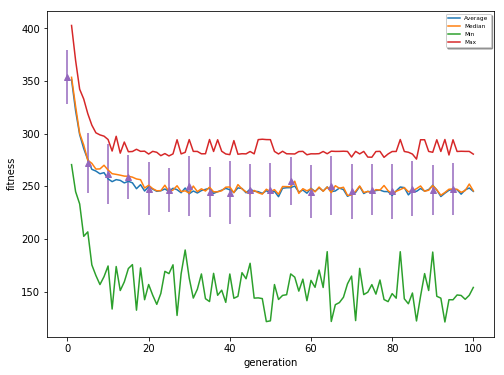

In [110]:
history_fitness = run_experiment_real(100, Rastrigin, 100, chrom_size,
                                 10, limits, num_decimals,
                                 100, "tournament", "generational")

plt.figure(figsize=(8,6))
plotGraphs(history_fitness)

In [111]:
results = history_fitness[:,99]
print("Mean: {}".format(np.median(results)))
print("Standard Deviation: {}".format(standarDeviation(results)))

Mean: 245.7486832435959
Standard Deviation: 25.40751906664447


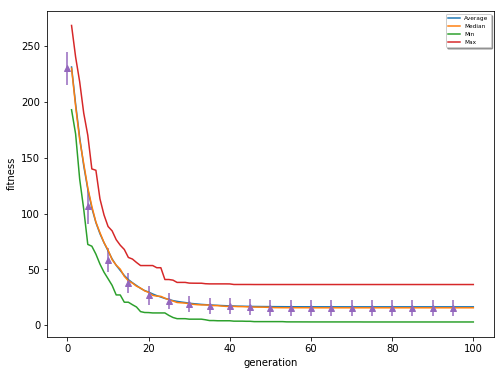

In [112]:
history_fitness = run_experiment_real(100, Rastrigin, 100, chrom_size,
                                 10, limits, num_decimals,
                                 100, "elitist", "stable_state")

plt.figure(figsize=(8,6))
plotGraphs(history_fitness)

In [113]:
results = history_fitness[:,99]
print("Mean: {}".format(np.median(results)))
print("Standard Deviation: {}".format(standarDeviation(results)))

Mean: 15.72538556223877
Standard Deviation: 7.327982518923459


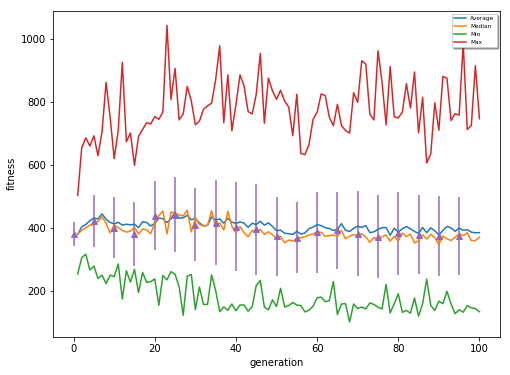

In [31]:
history_fitness = run_experiment_real(100, Rastrigin, 100, chrom_size,
                                 10, limits, num_decimals,
                                 100, "elitist", "generational")

plt.figure(figsize=(8,6))
plotGraphs(history_fitness)

In [33]:
results = history_fitness[:,99]
print("Mean: {}".format(np.median(results)))
print("Standard Deviation: {}".format(standarDeviation(results)))

Mean: 371.25154532786803
Standard Deviation: 125.22211819628647


## Rosenbrock

In [34]:
def Rosenbrock(x):
    return 100 * (x[0]**2-x[1])**2 + (1-x[0])**2

limits = [-2.048, 2.048]
num_decimals = 3
chrom_size = len(bin(round(limits[1] * (10**2))))-1

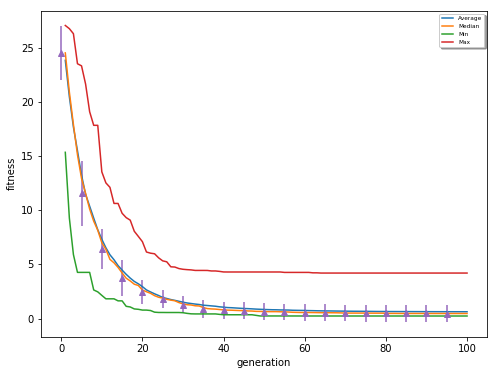

In [36]:
history_fitness = run_experiment_real(100, Rosenbrock, 100, chrom_size,
                                 2, limits, num_decimals,
                                 100, "roulette_wheel", "stable_state")

plt.figure(figsize=(8,6))
plotGraphs(history_fitness)

In [37]:
results = history_fitness[:,99]
print("Mean: {}".format(np.median(results)))
print("Standard Deviation: {}".format(standarDeviation(results)))

Mean: 0.4688743375999999
Standard Deviation: 0.7808270269496048


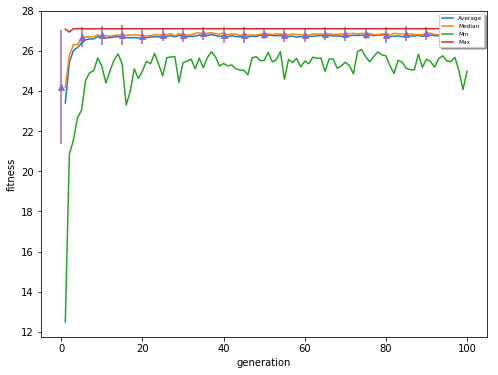

In [38]:
history_fitness = run_experiment_real(100, Rosenbrock, 100, chrom_size,
                                 2, limits, num_decimals,
                                 100, "roulette_wheel", "generational")

plt.figure(figsize=(8,6))
plotGraphs(history_fitness)

In [39]:
results = history_fitness[:,99]
print("Mean: {}".format(np.median(results)))
print("Standard Deviation: {}".format(standarDeviation(results)))

Mean: 26.79814251685
Standard Deviation: 0.34698450164559386


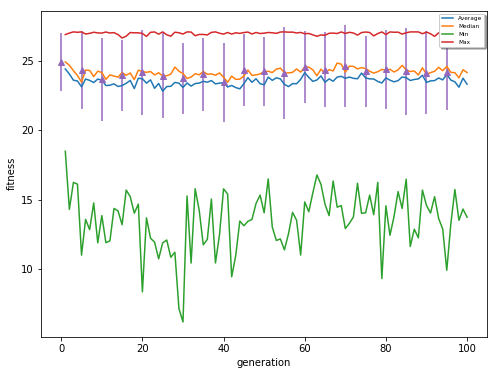

In [40]:
history_fitness = run_experiment_real(100, Rosenbrock, 100, chrom_size,
                                 2, limits, num_decimals,
                                 100, "rank", "generational")

plt.figure(figsize=(8,6))
plotGraphs(history_fitness)

In [41]:
results = history_fitness[:,99]
print("Mean: {}".format(np.median(results)))
print("Standard Deviation: {}".format(standarDeviation(results)))

Mean: 24.17517559685
Standard Deviation: 3.0901603813444525


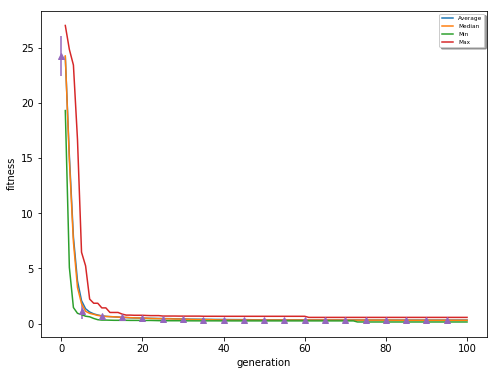

In [43]:
history_fitness = run_experiment_real(100, Rosenbrock, 100, chrom_size,
                                 2, limits, num_decimals,
                                 100, "rank", "stable_state")

plt.figure(figsize=(8,6))
plotGraphs(history_fitness)

In [44]:
results = history_fitness[:,99]
print("Mean: {}".format(np.median(results)))
print("Standard Deviation: {}".format(standarDeviation(results)))

Mean: 0.2943800121
Standard Deviation: 0.08218103660292349


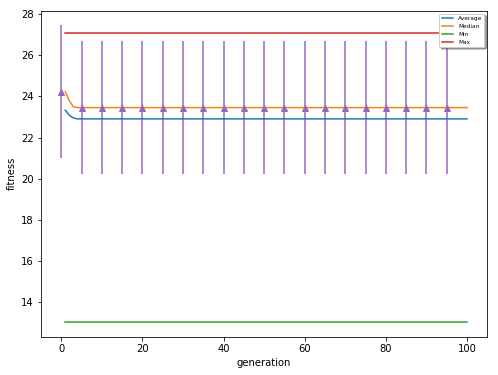

In [45]:
history_fitness = run_experiment_real(100, Rosenbrock, 100, chrom_size,
                                 2, limits, num_decimals,
                                 100, "tournament", "stable_state")

plt.figure(figsize=(8,6))
plotGraphs(history_fitness)

In [46]:
results = history_fitness[:,99]
print("Mean: {}".format(np.median(results)))
print("Standard Deviation: {}".format(standarDeviation(results)))

Mean: 23.4540022288
Standard Deviation: 3.214654983751375


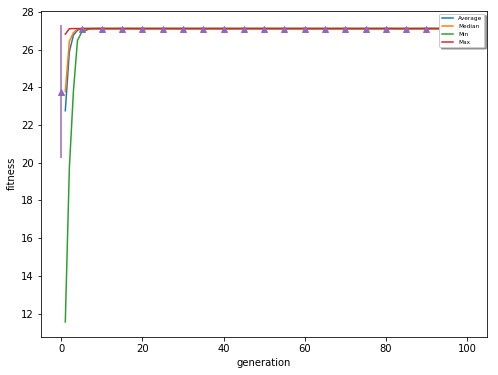

In [48]:
history_fitness = run_experiment_real(100, Rosenbrock, 100, chrom_size,
                                 2, limits, num_decimals,
                                 100, "tournament", "generational")

plt.figure(figsize=(8,6))
plotGraphs(history_fitness)

In [49]:
results = history_fitness[:,99]
print("Mean: {}".format(np.median(results)))
print("Standard Deviation: {}".format(standarDeviation(results)))

Mean: 27.112099999999998
Standard Deviation: 0.0014617251924150848


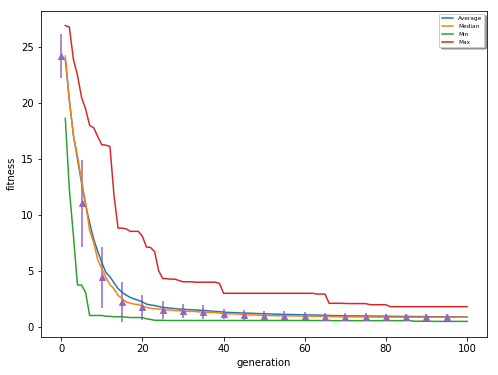

In [50]:
history_fitness = run_experiment_real(100, Rosenbrock, 100, chrom_size,
                                 2, limits, num_decimals,
                                 100, "elitist", "stable_state")

plt.figure(figsize=(8,6))
plotGraphs(history_fitness)

In [51]:
results = history_fitness[:,99]
print("Mean: {}".format(np.median(results)))
print("Standard Deviation: {}".format(standarDeviation(results)))

Mean: 0.82697073605
Standard Deviation: 0.25214828591144073


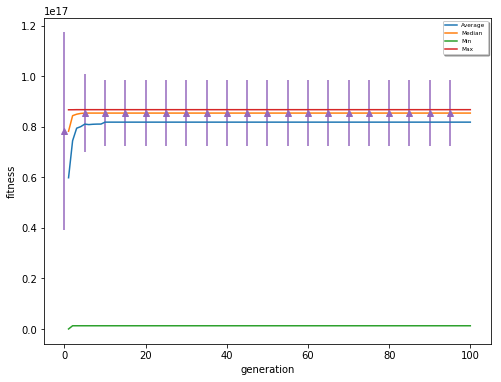

In [100]:
history_fitness = run_experiment_real(100, Rosenbrock, 100, chrom_size,
                                 2, limits, num_decimals,
                                 100, "elitist", "generational")

plt.figure(figsize=(8,6))
plotGraphs(history_fitness)

## Schwefel

In [93]:
def Schwefel(x):
    d = len(x)
    return 418.9829 * d + sum([-x[i]*np.sin(np.sqrt(abs(x[i]))) for i in range(d)])

limits = [-512, 512]
num_decimals = 1
chrom_size = len(bin(round(limits[1] * (10**2))))-1

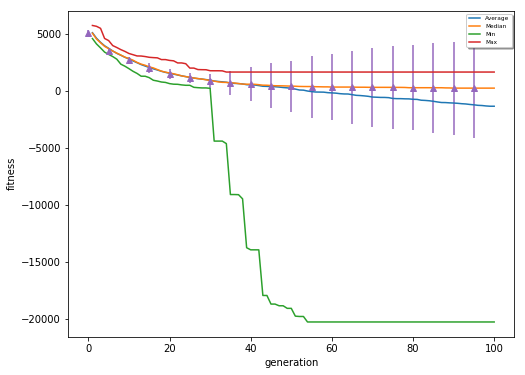

In [57]:
history_fitness = run_experiment_real(100, Schwefel, 100, chrom_size,
                                 10, limits, num_decimals,
                                 100, "roulette_wheel", "stable_state")

plt.figure(figsize=(8,6))
plotGraphs(history_fitness)

In [58]:
results = history_fitness[:,99]
print("Mean: {}".format(np.median(results)))
print("Standard Deviation: {}".format(standarDeviation(results)))

Mean: 271.89351057402337
Standard Deviation: 4451.693636025059


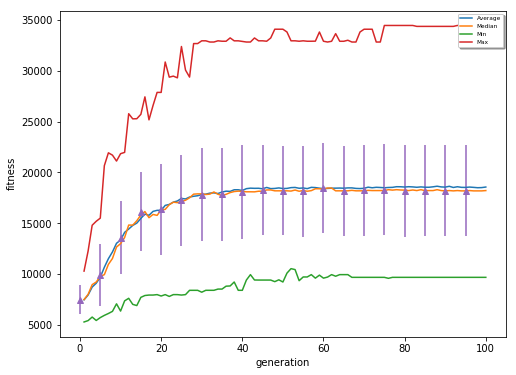

In [59]:
history_fitness = run_experiment_real(100, Schwefel, 100, chrom_size,
                                 10, limits, num_decimals,
                                 100, "roulette_wheel", "generational")

plt.figure(figsize=(8,6))
plotGraphs(history_fitness)

In [60]:
results = history_fitness[:,99]
print("Mean: {}".format(np.median(results)))
print("Standard Deviation: {}".format(standarDeviation(results)))

Mean: 18225.23652884912
Standard Deviation: 4457.859095414588


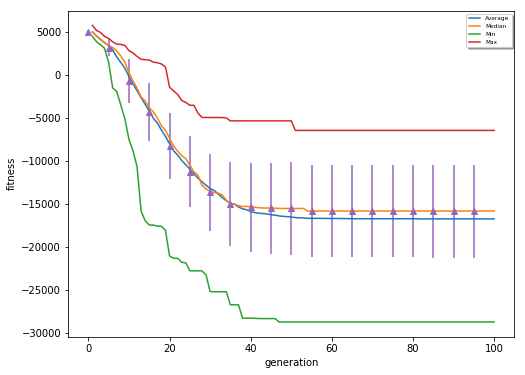

In [98]:
history_fitness = run_experiment_real(100, Schwefel, 100, chrom_size,
                                 10, limits, num_decimals,
                                 100, "rank", "stable_state")

plt.figure(figsize=(8,6))
plotGraphs(history_fitness)

In [99]:
results = history_fitness[:,99]
print("Mean: {}".format(np.median(results)))
print("Standard Deviation: {}".format(standarDeviation(results)))

Mean: -15831.982690362012
Standard Deviation: 5422.253795497409


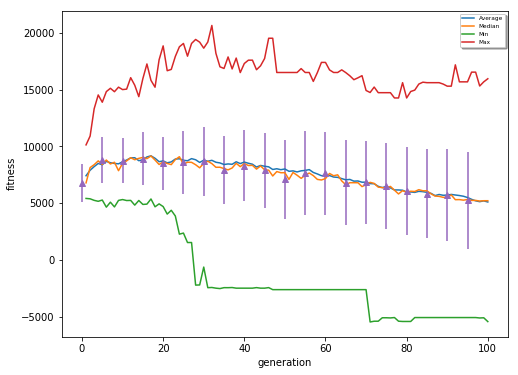

In [63]:
history_fitness = run_experiment_real(100, Schwefel, 100, chrom_size,
                                 10, limits, num_decimals,
                                 100, "rank", "generational")

plt.figure(figsize=(8,6))
plotGraphs(history_fitness)

In [64]:
results = history_fitness[:,99]
print("Mean: {}".format(np.median(results)))
print("Standard Deviation: {}".format(standarDeviation(results)))

Mean: 5223.663999182485
Standard Deviation: 4355.500450445286


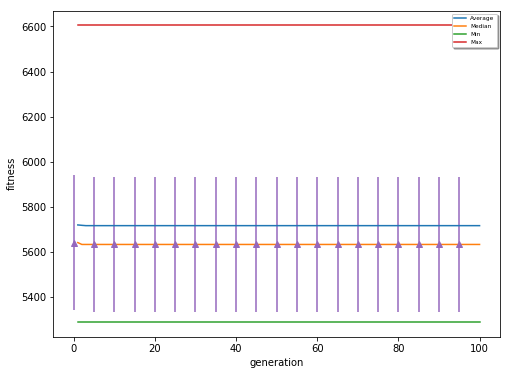

In [65]:
history_fitness = run_experiment_real(100, Schwefel, 100, chrom_size,
                                 10, limits, num_decimals,
                                 100, "tournament", "stable_state")

plt.figure(figsize=(8,6))
plotGraphs(history_fitness)

In [66]:
results = history_fitness[:,99]
print("Mean: {}".format(np.median(results)))
print("Standard Deviation: {}".format(standarDeviation(results)))

Mean: 5632.31150305067
Standard Deviation: 301.58504055431257


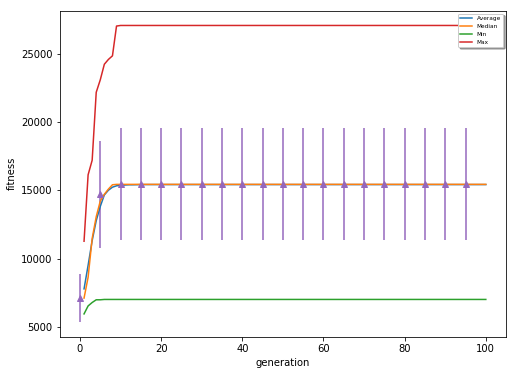

In [67]:
history_fitness = run_experiment_real(100, Schwefel, 100, chrom_size,
                                 10, limits, num_decimals,
                                 100, "tournament", "generational")

plt.figure(figsize=(8,6))
plotGraphs(history_fitness)

In [68]:
results = history_fitness[:,99]
print("Mean: {}".format(np.median(results)))
print("Standard Deviation: {}".format(standarDeviation(results)))

Mean: 15445.647221453597
Standard Deviation: 4116.736551922773


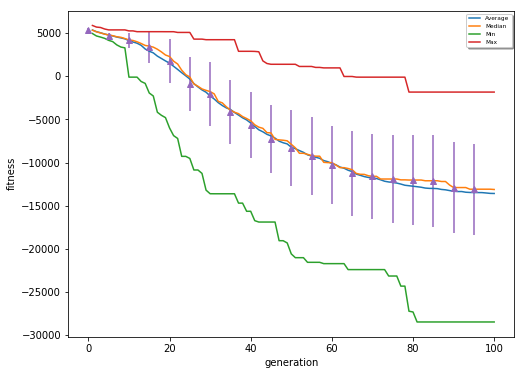

In [96]:
history_fitness = run_experiment_real(100, Schwefel, 100, chrom_size,
                                 10, limits, num_decimals,
                                 100, "elitist", "stable_state")

plt.figure(figsize=(8,6))
plotGraphs(history_fitness)

In [97]:
results = history_fitness[:,99]
print("Mean: {}".format(np.median(results)))
print("Standard Deviation: {}".format(standarDeviation(results)))

Mean: -13110.96639307053
Standard Deviation: 5207.273974947372


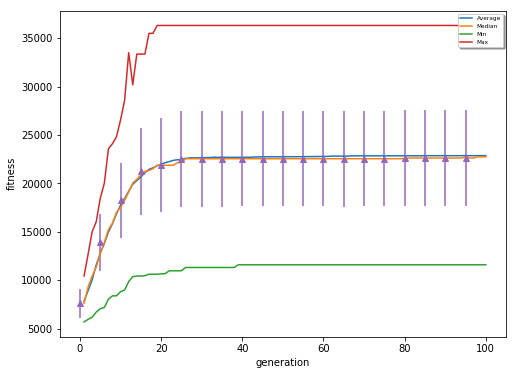

In [71]:
history_fitness = run_experiment_real(100, Schwefel, 100, chrom_size,
                                 10, limits, num_decimals,
                                 100, "elitist", "generational")

plt.figure(figsize=(8,6))
plotGraphs(history_fitness)

In [72]:
results = history_fitness[:,99]

print("Mean: {}".format(np.median(results)))
print("Standard Deviation: {}".format(standarDeviation(results)))

Mean: 22753.668787638508
Standard Deviation: 4917.810166506335


## Griewank

In [76]:
from functools import reduce

def Griewank(x):
    d = len(x)
    
    return 1 + (sum([x[i]**2 for i in range(d)])/4000) - reduce(lambda x,y: x*y, [np.cos(x[i]/(i+1)) for i in range(d)])

limits = [-600, 600]
num_decimals = 1
chrom_size = len(bin(round(limits[1] * (10**2))))-1

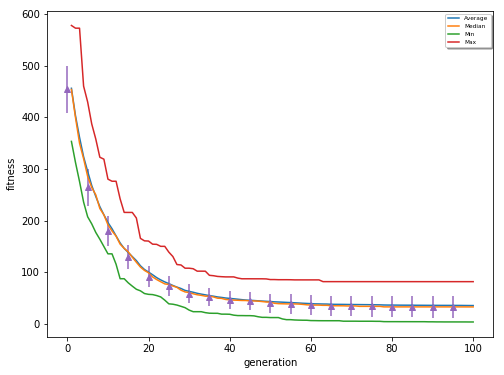

In [77]:
history_fitness = run_experiment_real(100, Griewank, 100, chrom_size,
                                 10, limits, num_decimals,
                                 100, "roulette_wheel", "stable_state")

plt.figure(figsize=(8,6))
plotGraphs(history_fitness)

In [78]:
results = history_fitness[:,99]

print("Mean: {}".format(np.median(results)))
print("Standard Deviation: {}".format(standarDeviation(results)))

Mean: 33.18907492326206
Standard Deviation: 20.856795193460243


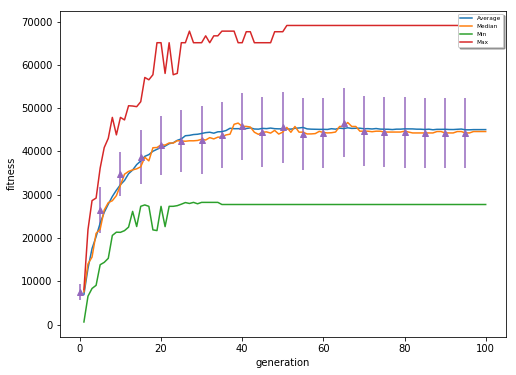

In [79]:
history_fitness = run_experiment_real(100, Griewank, 100, chrom_size,
                                 10, limits, num_decimals,
                                 100, "roulette_wheel", "generational")

plt.figure(figsize=(8,6))
plotGraphs(history_fitness)

In [80]:
results = history_fitness[:,99]

print("Mean: {}".format(np.median(results)))
print("Standard Deviation: {}".format(standarDeviation(results)))

Mean: 44599.50084444476
Standard Deviation: 8032.969642519316


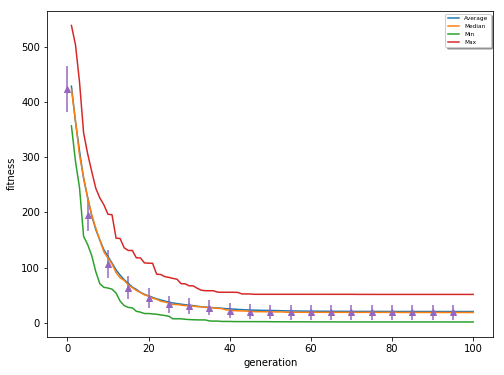

In [81]:
history_fitness = run_experiment_real(100, Griewank, 100, chrom_size,
                                 10, limits, num_decimals,
                                 100, "rank", "stable_state")

plt.figure(figsize=(8,6))
plotGraphs(history_fitness)

In [82]:
results = history_fitness[:,99]

print("Mean: {}".format(np.median(results)))
print("Standard Deviation: {}".format(standarDeviation(results)))

Mean: 18.508215946712376
Standard Deviation: 13.20332282309997


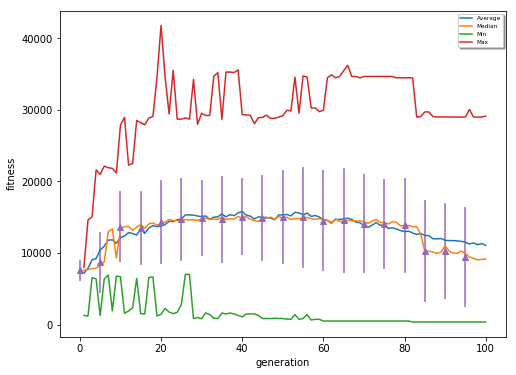

In [83]:
history_fitness = run_experiment_real(100, Griewank, 100, chrom_size,
                                 10, limits, num_decimals,
                                 100, "rank", "generational451.6936451.6936451.6936451.6936451.6936451.6936451.6936451.6936451.6936451.6936451.6936451.6936")

plt.figure(figsize=(8,6))
plotGraphs(history_fitness)

In [84]:
results = history_fitness[:,99]

print("Mean: {}".format(np.median(results)))
print("Standard Deviation: {}".format(standarDeviation(results)))

Mean: 9170.95260952163
Standard Deviation: 6955.494122332271


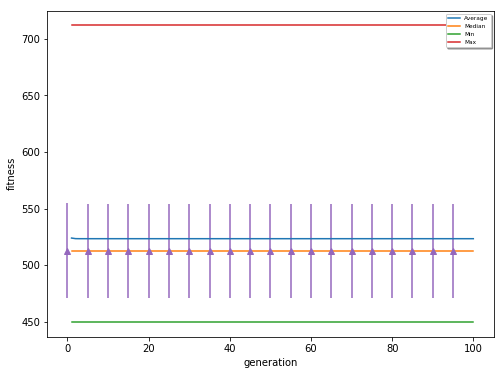

In [85]:
history_fitness = run_experiment_real(100, Griewank, 100, chrom_size,
                                 10, limits, num_decimals,
                                 100, "tournament", "stable_state")

plt.figure(figsize=(8,6))
plotGraphs(history_fitness)

In [86]:
results = history_fitness[:,99]

print("Mean: {}".format(np.median(results)))
print("Standard Deviation: {}".format(standarDeviation(results)))

Mean: 512.6693455652301
Standard Deviation: 41.740285848106886


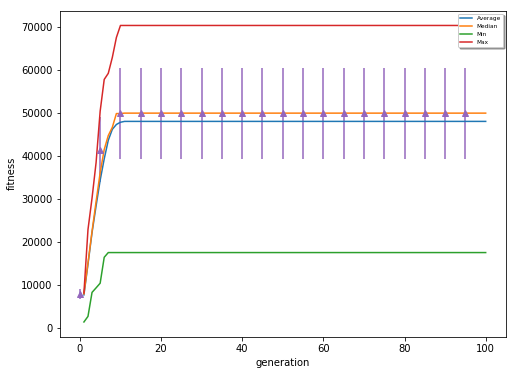

In [87]:
history_fitness = run_experiment_real(100, Griewank, 100, chrom_size,
                                 10, limits, num_decimals,
                                 100, "tournament", "generational")

plt.figure(figsize=(8,6))
plotGraphs(history_fitness)

In [88]:
results = history_fitness[:,99]

print("Mean: {}".format(np.median(results)))
print("Standard Deviation: {}".format(standarDeviation(results)))

Mean: 49882.914116401524
Standard Deviation: 10571.79045586739


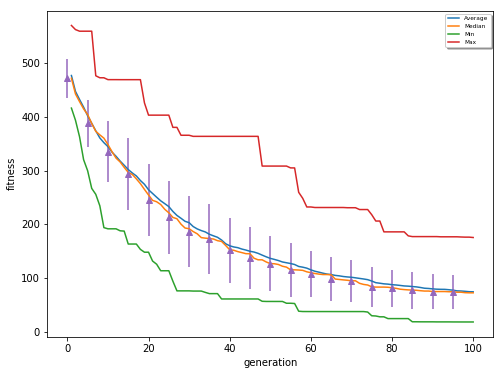

In [89]:
history_fitness = run_experiment_real(100, Griewank, 100, chrom_size,
                                 10, limits, num_decimals,
                                 100, "elitist", "stable_state")

plt.figure(figsize=(8,6))
plotGraphs(history_fitness)

In [90]:
results = history_fitness[:,99]

print("Mean: {}".format(np.median(results)))
print("Standard Deviation: {}".format(standarDeviation(results)))

Mean: 72.65387022816088
Standard Deviation: 30.424642242838647


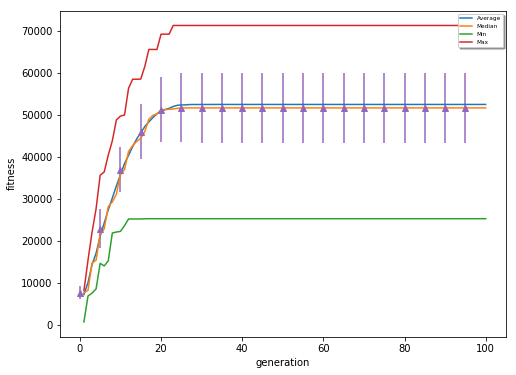

In [91]:
history_fitness = run_experiment_real(100, Griewank, 100, chrom_size,
                                 10, limits, num_decimals,
                                 100, "elitist", "generational")

plt.figure(figsize=(8,6))
plotGraphs(history_fitness)

In [92]:
results = history_fitness[:,99]

print("Mean: {}".format(np.median(results)))
print("Standard Deviation: {}".format(standarDeviation(results)))

Mean: 51653.64474222239
Standard Deviation: 8274.002082599247
